In [6]:
from __future__ import division
import numpy as np
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

In [7]:
## Setting the parameters of the model (calibrated values)
R, rho, gamma, eta, L, A, kapa = sym.var('R, rho, gamma, eta, L, A, kapa')

In [8]:
### Defining variables ###
k, x, y, l, r = sym.var('k, x, y, l, r')

### Defining production function ###

f = r*A*kapa*(eta*(k)**rho + (1- eta)*(y*(l/r)**x)**rho)**(gamma/rho) - k*R

In [4]:
f.diff(k)

A*eta*gamma*k**rho*kapa*r*(eta*k**rho + (y*(l/r)**x)**rho*(-eta + 1))**(gamma/rho)/(k*(eta*k**rho + (y*(l/r)**x)**rho*(-eta + 1))) - R

In [5]:
(r*A*eta*gamma*k**rho*kapa*(eta*k**rho - (l**x*y/r)**rho*(eta - 1))**(gamma/rho) - R*k*(eta*k**rho + (l**x*y/r)**rho*(-eta + 1)))/(k*(eta*k**rho - (l**x*y/r)**rho*(eta - 1)))

(A*eta*gamma*k**rho*kapa*r*(eta*k**rho - (l**x*y/r)**rho*(eta - 1))**(gamma/rho) - R*k*(eta*k**rho + (l**x*y/r)**rho*(-eta + 1)))/(k*(eta*k**rho - (l**x*y/r)**rho*(eta - 1)))

## Part 1: The first order condition.
Function:
$$rA\kappa(\eta(k)^{\rho} + (1 -\eta)(l^{x}y/r)^{\rho})^{\gamma/\rho} $$

Differentiating this function leads us to the first order condition:
$$rA\kappa\eta\gamma k^{\rho-1}(\eta(k)^{\rho} + (1 -\eta)(l^{x}y/r)^{\rho})^{(\gamma/\rho)-1}  - R = 0 $$

## Part 2: A closer look at the polynomial for the FOC

We can rename $K = k^{1/4}$, subsitute $\rho=0.25$ and $\gamma=0.5$ and obtain a thrid degree polynomial in $K$:

$$rA\kappa\eta(\eta K + (1 -\eta)(l^{x}y/r)^{\rho}) - 2 R K^{3} = 0$$
or
$$- 2 R K^{3} + rA\kappa\eta^{2} K + rA\kappa\eta(1 -\eta)(l^{x}y/r)^{0.25}  = 0$$

In [11]:
## Defining auxiliary functions a, c, d
a = -2*R
c = r*A*kapa*(eta**2)
d = r*A*kapa*eta*(1-eta)*(y*(l/r)**x)**(0.25)
K = sym.var('K')
pol_K = K**3*a + K*c + d
#sym.solve(pol_K, K, warn=True, set=True, rational=True, manual=True)
polik = sym.lambdify((K,x,y,l,r,A,kapa,eta,R),pol_K)

...which doesn't seem to work. How to solve this cubic equation?

There are several ways. But before proceeding, it is good to visualise the equation for the parameters of the model and reasonable values of the variables.

Next cell plots, for some range of values from 0 to 10, the value of the polynomial we are after. When the line crosses the vertical zero, we have a root. It is easy to see that there are, in fact, 3 real roots, two negatives and one positive.

# Part 3: Solving for K
From wikipedia, the first step is to check for the condition below:

<img src='http://upload.wikimedia.org/math/8/0/e/80efae5ccea2ac0702e1a9c3b25afd2b.png'>

if $\Delta$ < 0 --> only one real root

if $\Delta$ > 0 --> three real roots

if $\Delta$ = 0 --> combination of both

In our case, as $b=0$, the condition is reduced to:

$$\Delta = -4ac^{3} - 27a^{2}d^{2}$$

Where $a = -2R$, $c = rA\kappa\eta^{2}$, $d = rA\kappa\eta(1-\eta)(y(l/r)^{x})^{0.25}$

Substituting we get:

$$8R(rA\kappa)^{3}\eta^{6} - 108 R^{2} (rA\kappa)^{2}\eta^{2}(1-\eta)^{2}(y(l/r)^{x})^{0.5}$$


In [9]:
def delta_condition(x,y,l,r,A,kappa,eta,R):
    '''
    Condition for one real root
    
    Input: A series of model parameters and values (x,y,l,r,A,kappa,eta,R)
    
    Output: the numerical value of the Delta equation followed by a string with the meaning of it.
    '''
    delta1 = 8*R*(r*A*kappa)**3*eta**6 - 108*(R*A*kappa*r)**2*(eta**2)*((1-eta)**2)*(y*(l/r)**x)**(0.5)
    if delta1> 0 :
        mes = '--> Three real roots'
    elif delta1<0 :
        mes = '--> One real root'
    else:
        mes = '--> At least one complex root'
    return delta1, mes

# Example for (1,10,10):
print delta_condition(1.0,1.0,1,1.0,1.0,1.0,0.89,0.13099)

(0.5030357158439132, '--> Three real roots')


## 3.1 Discriminat way

When the cubic equation has only one real root, we can find it by either the classical way of the discriminant or using hyperbolic functions.

The classical way of finding the root ($x_{1}$) is:
$$ x_{1} = -\frac{C}{3a}- \frac{3ac}{C}$$

where:

$$C = \sqrt[3]{-\frac{2}{3}ac+\frac{1}{2}\sqrt{-(27a^{2}\Delta)}} $$

and $\Delta$ is the discriminat defined above.

In [12]:
discrim = 8*R*(r*A*kapa)**3*eta**6 - 108*(R*A*kapa*r)**2*(eta**2)*((1-eta)**2)*(y*(l/r)**x)**(0.5)
C = (-1.5*a*c+ 0.5*(-27*a**2*discrim)**(0.5))**(1/3)

In [13]:
x1 = (-1/(3*a))*(C - (3*a*c)/C)

In [14]:
x1

(6*A*R*eta**2*kapa*r*(3.0*A*R*eta**2*kapa*r + 0.5*108**0.5*(-R**2*(8*A**3*R*eta**6*kapa**3*r**3 - 108*A**2*R**2*eta**2*kapa**2*r**2*(y*(l/r)**x)**0.5*(-eta + 1)**2))**0.5)**(-0.333333333333333) + (3.0*A*R*eta**2*kapa*r + 0.5*108**0.5*(-R**2*(8*A**3*R*eta**6*kapa**3*r**3 - 108*A**2*R**2*eta**2*kapa**2*r**2*(y*(l/r)**x)**0.5*(-eta + 1)**2))**0.5)**0.333333333333333)/(6*R)

The problem with this kind of expressions is that it may force numpy to raise to a fractional power a negative number, which returns an error. We split the expression above and glue it together in a way numpy can process, $x_{2}$, or $x^{root}$ in it exacutable form :

In [18]:
part1 = 6*A*R*eta**2*kapa*r*(3.0*A*R*eta**2*kapa*r + 0.5*108**0.5*(-R**2*(8*A**3*R*eta**6*kapa**3*r**3 - 341.525987298185*A**2*R**2*eta**2*kapa**2*r**2*(-eta + 1)**2*((l/r)**x)**0.5))**0.5)**(-0.333333333333333)

part2 = (3.0*A*R*eta**2*kapa*r + 5.1961524227066318805823390245176*(-R**2*(8*A**3*R*eta**6*kapa**3*r**3 - 341.525987298185*A**2*R**2*eta**2*kapa**2*r**2*(-eta + 1)**2*((l/r)**x)**0.5))**0.5)**0.333333333333333

x2 = (part1 + part2) / (6*R)

In [19]:
x_root = sym.lambdify((x,y,l,r,A,kapa,eta,R),x2)
x_root(1.1,10,1.0,1.0,0.5105,1,0.89,0.83684)

0.567683977069969

## 3.2 Trigonometric way

However simple, the executable form of ***x_root*** can still have fractional power problems.

Another way to find the real root is the *Trigonometric Method*. This is also robust to the case when there are up to three real roots. The mechanism is to approximate the polynomial with a combination of trigonometric functions. In the case when there are less that three real roots, hyperbolic functions are required.

A condition annalogous to the one one before to check which f the cases (1 or multiple real roots) is:

In [20]:
def trig_condition(x,y,l,r,A,kappa,eta,R):
    '''
    Condition for three real roots
    
    Input: A series of model parameters and values (x,y,l,r,A,kappa,eta,R)
    
    Output: the numerical value of the trigonometric condition equation followed by the result.
    '''
    arcosine = (27/4)*(1-eta)*(y*l/r)**(1/2) - ((eta**4)*r*A*kappa*(x**(1/2)))/(2*R)
    if arcosine<=0:
        message = "The equation has three real roots"
    else:
        message = "The equation has at least one imaginary root"
    return arcosine, message
trig_condition(0.9,10,1.0,1.0,0.5105,1,0.89,0.83684)

(2.1664376728876715, 'The equation has at least one imaginary root')

We need then to define auxiliary functions $p$ and $q$. Then if there is only one root, ***hyper_root*** gives the expression for it, whereas ***root_zero/root_one/root_two***  give the three real roots:

In [21]:
p = -(eta**2*A*r*kapa)/(2*R)
q = -(eta*(1-eta)*kapa*r*A*(y*(l/r)**x)**(1/4))/(2*R)
qmin = (eta*(1-eta)*kapa*r*A*(y*(l/r)**x)**(1/4))/(2*R)

hyper_root = 2 * (-p/3)**(0.5) * sym.cosh( (1/3)*sym.acosh( (3*q)/(2*p) * (-3/p)**(0.5) ) )

root_zero = 2*(-p/3)**(0.5)*sym.cos(((1/3)*sym.acos(((3*q)/(2*p))*(-3/p)**(1/2))))
root_two = -(2*(-p/3)**(0.5)*sym.cos(((1/3)*sym.acos(((3*qmin)/(2*p))*(-3/p)**(1/2)))))
root_one =  - root_zero - root_two
#print "First root =", root_zero
#print "Second root =", root_one
#print "Thrird root =", root_two

print hyper_root

2*6**(-0.5)*(A*eta**2*kapa*r/R)**0.5*cosh(0.333333333333333*acosh(3*6**0.5*(y*(l/r)**x)**0.25*(R/(A*eta**2*kapa*r))**0.5*(-eta + 1)/(2*eta)))


All of these expression can eb easily passed to an executable form in numpy:

In [22]:
HRt = sym.lambdify((x,y,l,r,A,kapa,eta,R), hyper_root)
Rt0 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_zero)
Rt1 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_one)
Rt2 = sym.lambdify((x,y,l,r,A,kapa,eta,R), root_two)
#Rt0(1,1,1,1,1,1,0.89,0.13099), Rt1(1,1,1,1,1,1,0.89,0.13099), Rt2(1,1,1,1,1,1,0.89,0.13099)
HRt(1.0,10.0,1.0,1.0,0.5105,1.0,0.89,0.83684), x_root(1.0,10.0,1.0,1.0,0.5105,1.0,0.89,0.83684) #Rt0(1.0,10.0,1.0,1.0,0.5105,1.0,0.89,0.83684)

(0.5775363683094399, 0.567683977069969)

An we can check that both ***hyper_root*** and $x^{root}$ give the same (correct) solution:

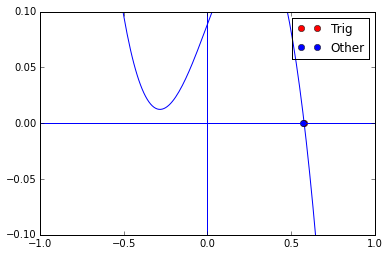

In [23]:
K_range = np.arange(-2.0,2.0,0.01)
plt.plot(K_range, polik(K_range,1.0,10,1.0,1.0,0.5105,1,0.89,0.83684))
plt.plot((HRt(1.1,10,1.0,1.0,0.5105,1,0.89,0.83684)), 0, 'ro', label="Trig")
plt.plot((x_root(1.0,10,1.0,1.0,0.5105,1,0.89,0.83684)), 0, 'bo', label="Other")
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)
plt.axvline()
plt.axhline()
plt.legend()
plt.show()

# 4 The Worst Case Scenario

The worst case scenario is when parameters are such that from a one root solution we can enter a domain of three root solution and vice-versa. This is worrying because we need a **single** closed form for capital for the solver to work.

For example, take the poor country parameters:

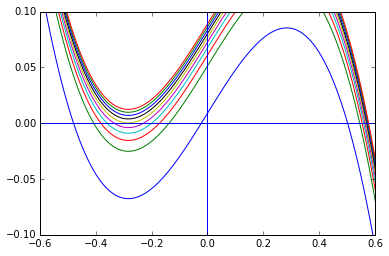

In [24]:
K_range = np.arange(-3.0,3.0,0.01)
# We let y vary on its whole domain, x constant:
y_range = np.linspace(1e-3,10.0,10)
for y in y_range:
    plt.plot(K_range, polik(K_range,1.0,y,1.0,1.0,0.5105,1,0.89,0.83684))
#plt.plot((x_root(1.1,10,1.0,1.0,0.5105,1,0.89,0.83684)), 0, 'ro', label="Root 0")
plt.xlim(-0.6,0.6)
plt.ylim(-0.1,0.1)
plt.axvline()
plt.axhline()
plt.show()

Sometimes the polynomial crosses the zero x-axis three times, sometimes two or one.

# Appendix

## Three root case

We can see that the three roots defined above indeed solve the problem when there are three real roots:

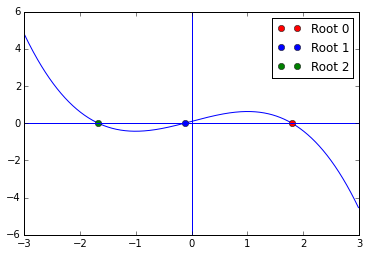

In [94]:
K_range = np.arange(-3.0,3.0,0.01)
plt.plot(K_range, polik(K_range,1,1,1,1,1,1,0.89,0.13099))
plt.plot((Rt0(1,1,1,1,1,1,0.89,0.13099)), 0, 'ro', label="Root 0")
plt.plot(Rt1(1,1,1,1,1,1,0.89,0.13099), 0, 'bo', label="Root 1")
plt.plot(Rt2(1,1,1,1,1,1,0.89,0.13099), 0, 'go', label="Root 2")
plt.legend()
plt.axvline()
plt.axhline()
plt.show()

Because $k = K^4$, all of the roots will deliver positive capital. However, below is the plot of the profits for different values of $y$ and $l$, keeping $x$ constant:

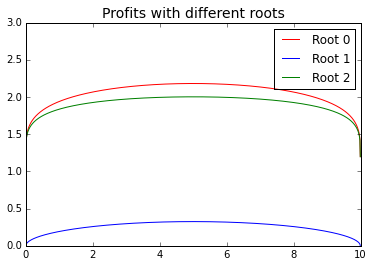

In [62]:
f_eval = sym.lambdify((k,x,y,l,r,A,kapa,eta,R,rho,gamma),f)
y_range=np.arange(0,10,0.01)
l_range=np.arange(0,17,17/1000)
l_range = l_range[::-1]
p0 = []
p1 = []
p2 = []
for i in range(1000):
    p0.append(f_eval(Rt0(1,y_range[i],l_range[i],1,1,1,0.89,0.13099)**4,1,y_range[i],l_range[i],1,1,1,0.89,0.13099,0.25,0.5))
    p1.append(f_eval(Rt1(1,y_range[i],l_range[i],1,1,1,0.89,0.13099)**4,1,y_range[i],l_range[i],1,1,1,0.89,0.13099,0.25,0.5))
    p2.append(f_eval(Rt2(1,y_range[i],l_range[i],1,1,1,0.89,0.13099)**4,1,y_range[i],l_range[i],1,1,1,0.89,0.13099,0.25,0.5))
plt.plot(y_range,p0,c='r',label='Root 0')
plt.plot(y_range,p1,c='b',label='Root 1')
plt.plot(y_range,p2,c='g',label='Root 2')
plt.ylim(0,3)
plt.title('Profits with different roots', size=14)
plt.legend()
plt.show()

Root 0 strictly dominates all of the other roots.

That means we have a winner! Below is the expression for optimal capital, *k_star*:

In [63]:
k_star = (2*6**(-0.5)*(A*eta**2*kapa/R)**0.5*sym.cos(0.333333333333333*sym.acos(3*6**0.5*(l**x*y/r)**0.25*(R/(A*eta**2*kapa))**0.5*(-eta + 1)/(2*eta))))**(4)

And here is how the adapted hyperbolic solution looks like - to be used in other notebooks:

In [30]:
Hk_star = hyper_root**4
Hk_star

16*6**(-2.0)*(A*eta**2*kapa*r/R)**2.0*cosh(0.333333333333333*acosh(3*6**0.5*(y*(l/r)**x)**0.25*(R/(A*eta**2*kapa*r))**0.5*(-eta + 1)/(2*eta)))**4